Acheived a accuracy of ~98% . Starting with the EDA, I have dealt with the null values,handled the categorical and numerical
values seperately , worked on skewness of numerical features, converted categorical values using pandas get_dummies.

Created a new feature VOLUME using x,y,z feature from the dataset. This helped to improve my accuracy.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 11)

# Check for duplicate row.

In [4]:
idsUnique = len(set(data['Unnamed: 0']))
idsTotal = data.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col


0


In [5]:
data=data.drop(['Unnamed: 0'],axis=1)

In [6]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Handling missing values

In [8]:
data_nas = data.isnull().sum()
data_nas = data_nas[data_nas>0]
data_nas.sort_values(ascending = False)

Series([], dtype: int64)

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


The minimum values for x,y and z here are 0 but it is not possible because according to the data description they are the length, width and depth

In [10]:
print("Number of rows with x == 0: {} ".format((data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((data.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


A zero value in these rows means missing data so we can replace the zeros with nan. Another thing to notice is that the depth column doesn't have a single zero value. We know that depth is calculated using the three parameters only

In [11]:
data[['x','y','z']] = data[['x','y','z']].replace(0,np.NaN)

In [12]:
data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(53920, 10)

In [15]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Since the dataset is big enough dropping 20 rows shouldn't cost us much hence the nans have been dropped.

# Dividing the categorical and numerical data

In [16]:
categorical_features = data.select_dtypes(include=['object']).columns
categorical_features

Index(['cut', 'color', 'clarity'], dtype='object')

In [17]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [18]:
data_num = data[numerical_features]
data_cat = data[categorical_features]

In [19]:
data_num.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [20]:
data_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


# Skewness of the numerical data


 mu = 3930.99 and sigma = 3987.24



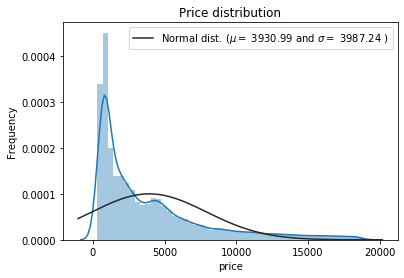

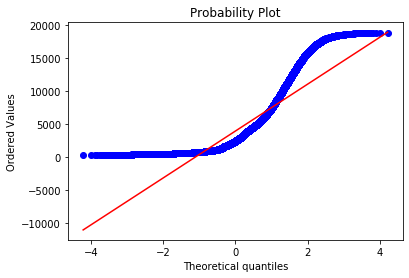

In [21]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()


 mu = 7.79 and sigma = 1.01



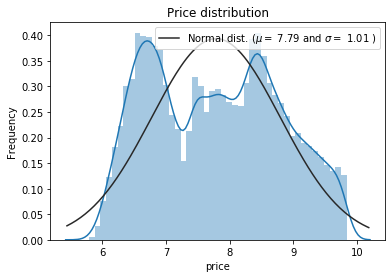

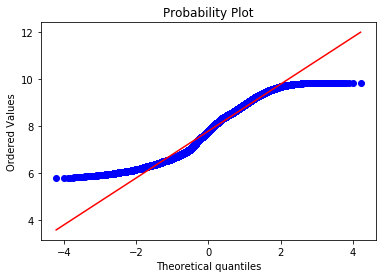

In [22]:
data['price'] = np.log1p(data['price'] )
y=data['price']

sns.distplot(data['price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

In [23]:
data_num=data_num.drop(['price'],axis=1)

In [24]:
from scipy.stats import skew 
skewness = data_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

y        2.462142
z        1.585446
carat    1.116176
table    0.796777
x        0.398336
depth   -0.081724
dtype: float64

In [25]:
type(skewness)

pandas.core.series.Series

In [26]:
skewness = skewness[abs(skewness)>0.05]
skewness.index

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [27]:
data_skew = data_num[skewness.index]
data_skew .columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [28]:
data_skew = np.log1p(data_skew )

In [29]:
data_skew 

,carat,depth,table,x,y,z
0,0.207014,4.135167,4.025352,1.599388,1.605430,1.232560
1,0.190620,4.107590,4.127134,1.587192,1.576915,1.196948
2,0.207014,4.058717,4.189655,1.619388,1.623341,1.196948
3,0.254642,4.149464,4.077537,1.648659,1.654411,1.289233
4,0.270027,4.163560,4.077537,1.675226,1.677097,1.321756
...,...,...,...,...,...,...
53935,0.542324,4.123903,4.060443,1.909543,1.911023,1.504077
53936,0.542324,4.160444,4.025352,1.900614,1.909543,1.528228
53937,0.530628,4.155753,4.110874,1.896119,1.899118,1.517323
53938,0.620576,4.127134,4.077537,1.967112,1.962908,1.556037


In [30]:
data_num1=data_num.drop(['carat','table','x','y','z'],axis=1)
data_numerical=pd.concat([data_skew ,data_num1],axis=1)
data_numerical

,carat,depth,table,x,y,z,depth
0,0.207014,4.135167,4.025352,1.599388,1.605430,1.232560,61.5
1,0.190620,4.107590,4.127134,1.587192,1.576915,1.196948,59.8
2,0.207014,4.058717,4.189655,1.619388,1.623341,1.196948,56.9
3,0.254642,4.149464,4.077537,1.648659,1.654411,1.289233,62.4
4,0.270027,4.163560,4.077537,1.675226,1.677097,1.321756,63.3
...,...,...,...,...,...,...,...
53935,0.542324,4.123903,4.060443,1.909543,1.911023,1.504077,60.8
53936,0.542324,4.160444,4.025352,1.900614,1.909543,1.528228,63.1
53937,0.530628,4.155753,4.110874,1.896119,1.899118,1.517323,62.8
53938,0.620576,4.127134,4.077537,1.967112,1.962908,1.556037,61.0


# Handeling the categorical data

In [31]:
data.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,7.787048,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,1.014002,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,5.789960,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,6.856462,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,7.784057,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,8.580027,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,9.842888,10.740000,58.900000,31.800000


In [32]:
data_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


All the three are ordinal data.

In [33]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

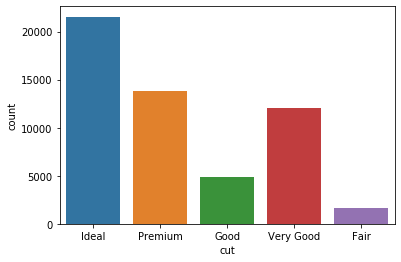

In [34]:
sns.countplot(x='cut',data=data)

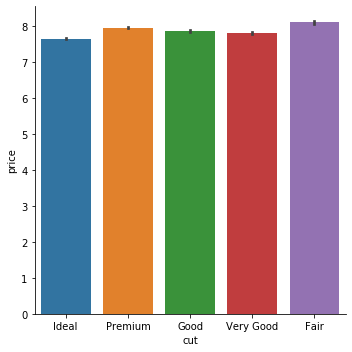

In [35]:
g=sns.catplot(x='cut',y='price',data=data,kind='bar')

In [36]:
data['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [37]:
data_cat['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

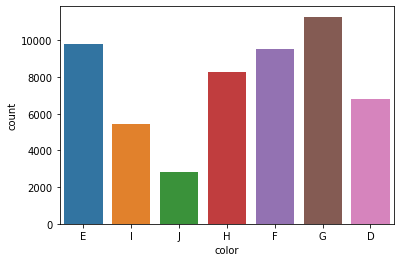

In [38]:
sns.countplot(x='color',data=data)

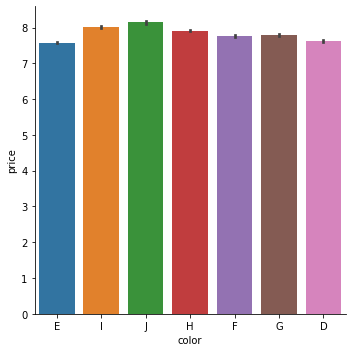

In [39]:
p=sns.catplot(x='color',y='price',data=data,kind='bar')
p

In [40]:
data['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

In [41]:
data_cat['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

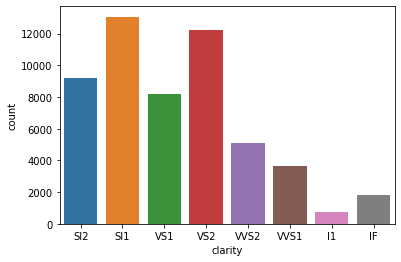

In [42]:
sns.countplot(x='clarity',data=data)

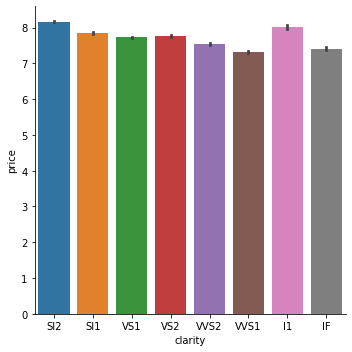

In [43]:
sns.catplot(x='clarity',y='price',data=data,kind='bar')

In [44]:
data['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

In [45]:
data_cat.head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [46]:
diamond_onehot=data_cat.copy()

In [47]:
for i in range(data_cat.shape[1]):
    diamond_onehot=pd.get_dummies(diamond_onehot,columns=[data_cat.columns[i]],prefix=[data_cat.columns[i]])
diamond_onehot


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


Concat categorical and numerical data

In [48]:
data_final=pd.concat([data_numerical,diamond_onehot,y],axis=1)

In [49]:
data_final

,carat,depth,table,x,y,z,depth,cut_Fair,cut_Good,cut_Ideal,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.207014,4.135167,4.025352,1.599388,1.605430,1.232560,61.5,0,0,1,...,0,0,0,0,1,0,0,0,0,5.789960
1,0.190620,4.107590,4.127134,1.587192,1.576915,1.196948,59.8,0,0,0,...,0,0,0,1,0,0,0,0,0,5.789960
2,0.207014,4.058717,4.189655,1.619388,1.623341,1.196948,56.9,0,1,0,...,0,0,0,0,0,1,0,0,0,5.793014
3,0.254642,4.149464,4.077537,1.648659,1.654411,1.289233,62.4,0,0,0,...,0,0,0,0,0,0,1,0,0,5.814131
4,0.270027,4.163560,4.077537,1.675226,1.677097,1.321756,63.3,0,1,0,...,1,0,0,0,1,0,0,0,0,5.817111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.542324,4.123903,4.060443,1.909543,1.911023,1.504077,60.8,0,0,1,...,0,0,0,1,0,0,0,0,0,7.922261
53936,0.542324,4.160444,4.025352,1.900614,1.909543,1.528228,63.1,0,1,0,...,0,0,0,1,0,0,0,0,0,7.922261
53937,0.530628,4.155753,4.110874,1.896119,1.899118,1.517323,62.8,0,0,0,...,0,0,0,1,0,0,0,0,0,7.922261
53938,0.620576,4.127134,4.077537,1.967112,1.962908,1.556037,61.0,0,0,0,...,0,0,0,0,1,0,0,0,0,7.922261


# Find correlation

In [50]:
print("Find most important features relative to target")
corr = data_final.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
corr
print(corr['price'])

Find most important features relative to target
price            1.000000
x                0.965932
y                0.964094
z                0.959590
carat            0.953532
clarity_SI2      0.169711
table            0.160008
cut_Premium      0.094488
color_J          0.083086
color_I          0.077882
color_H          0.055127
cut_Fair         0.052993
clarity_SI1      0.034167
clarity_I1       0.027969
cut_Good         0.017442
cut_Very Good    0.006480
color_G          0.001309
depth            0.000896
depth           -0.000877
color_F         -0.011007
clarity_VS2     -0.012720
clarity_VS1     -0.025713
color_D         -0.063451
clarity_IF      -0.069635
clarity_VVS2    -0.081109
color_E         -0.096153
cut_Ideal       -0.118301
clarity_VVS1    -0.123333
Name: price, dtype: float64


In [51]:
abc = corr['price'][abs(corr['price'])>0.05]
abc.index

Index(['price', 'x', 'y', 'z', 'carat', 'clarity_SI2', 'table', 'cut_Premium',
       'color_J', 'color_I', 'color_H', 'cut_Fair', 'color_D', 'clarity_IF',
       'clarity_VVS2', 'color_E', 'cut_Ideal', 'clarity_VVS1'],
      dtype='object')

In [52]:
type(corr)

pandas.core.frame.DataFrame

In [53]:
data_model=data_final[abc.index]
data_model

,price,x,y,z,carat,clarity_SI2,table,cut_Premium,color_J,color_I,color_H,cut_Fair,color_D,clarity_IF,clarity_VVS2,color_E,cut_Ideal,clarity_VVS1
0,5.789960,1.599388,1.605430,1.232560,0.207014,1,4.025352,0,0,0,0,0,0,0,0,1,1,0
1,5.789960,1.587192,1.576915,1.196948,0.190620,0,4.127134,1,0,0,0,0,0,0,0,1,0,0
2,5.793014,1.619388,1.623341,1.196948,0.207014,0,4.189655,0,0,0,0,0,0,0,0,1,0,0
3,5.814131,1.648659,1.654411,1.289233,0.254642,0,4.077537,1,0,1,0,0,0,0,0,0,0,0
4,5.817111,1.675226,1.677097,1.321756,0.270027,1,4.077537,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,7.922261,1.909543,1.911023,1.504077,0.542324,0,4.060443,0,0,0,0,0,1,0,0,0,1,0
53936,7.922261,1.900614,1.909543,1.528228,0.542324,0,4.025352,0,0,0,0,0,1,0,0,0,0,0
53937,7.922261,1.896119,1.899118,1.517323,0.530628,0,4.110874,0,0,0,0,0,1,0,0,0,0,0
53938,7.922261,1.967112,1.962908,1.556037,0.620576,1,4.077537,1,0,0,1,0,0,0,0,0,0,0


Now x,y,z are length ,breadth and width. so its better if we calculate the volume and drop the 3 feature.


In [54]:
data_model['volume'] = data_model['x']*data_model['y']*data_model['z']

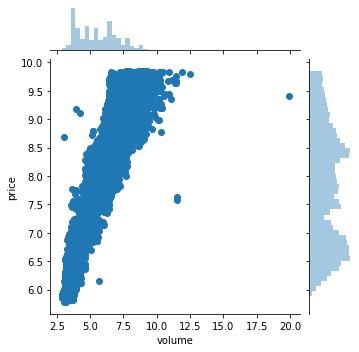

In [55]:
sns.jointplot(x='volume', y='price' , data=data_model, size=5)

It seems there is a linear relation betn volume and price. so we can take it

In [56]:
data_model.drop(['x','y','z'], axis=1, inplace= True)

In [57]:
data_model

,price,carat,clarity_SI2,table,cut_Premium,color_J,color_I,color_H,cut_Fair,color_D,clarity_IF,clarity_VVS2,color_E,cut_Ideal,clarity_VVS1,volume
0,5.789960,0.207014,1,4.025352,0,0,0,0,0,0,0,0,1,1,0,3.164851
1,5.789960,0.190620,0,4.127134,1,0,0,0,0,0,0,0,1,0,0,2.995802
2,5.793014,0.207014,0,4.189655,0,0,0,0,0,0,0,0,1,0,0,3.146560
3,5.814131,0.254642,0,4.077537,1,0,1,0,0,0,0,0,0,0,0,3.516459
4,5.817111,0.270027,1,4.077537,0,1,0,0,0,0,0,0,0,0,0,3.713493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,7.922261,0.542324,0,4.060443,0,0,0,0,0,1,0,0,0,1,0,5.488648
53936,7.922261,0.542324,0,4.025352,0,0,0,0,0,1,0,0,0,0,0,5.546402
53937,7.922261,0.530628,0,4.110874,0,0,0,0,0,1,0,0,0,0,0,5.463810
53938,7.922261,0.620576,1,4.077537,1,0,0,1,0,0,0,0,0,0,0,6.008264


# Modelling

In [58]:
Data_out=data_model['price']
input_data=data_model.drop(['price'],axis=1)


In [59]:
R2_Scores = []
models1 = ['Linear Regression' , 'GradientBoosting Regression' ,'DecisionTreeRegressor','SVR','RandomForestRegressor','stacking','KNeighbours Regression']

In [60]:
#data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(input_data,Data_out,test_size=0.10)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.10)

In [61]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 43675
Number of data points in test data: 5392
Number of data points in cross validation data: 4853


In [62]:
X_train.head()

,carat,clarity_SI2,table,cut_Premium,color_J,color_I,color_H,cut_Fair,color_D,clarity_IF,clarity_VVS2,color_E,cut_Ideal,clarity_VVS1,volume
4284,0.693147,0,4.043051,0,0,0,0,0,0,0,0,1,1,0,6.419383
42150,0.405465,0,4.043051,0,0,0,0,0,0,0,0,0,1,0,4.740380
48549,0.500775,0,4.007333,0,0,0,0,0,0,0,0,1,1,0,5.322343
47555,0.530628,0,4.060443,0,1,0,0,0,0,0,0,0,1,0,5.435049
15563,0.698135,0,4.043051,0,0,0,0,0,0,0,0,0,1,0,6.462127


In [63]:
y_train.head()

4284     8.184514
42150    7.156956
48549    7.595890
47555    7.536364
15563    8.738735
Name: price, dtype: float64

# Standarization

In [64]:
# X_train.describe()


y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)
y_cv= y_cv.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)
X_cv = sc_X.fit_transform(X_cv)
y_cv = sc_y.fit_transform(y_cv)

# Linear regression

In [65]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train,y_train)
print(lm)

# print the intercept
print(lm.intercept_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[-2.42356144e-15]


In [66]:
print(lm.coef_)

[[-0.76525451 -0.09178515  0.01632428  0.00513264 -0.08836064 -0.07786709
  -0.05083811 -0.01930939  0.03598864  0.06231007  0.06400664  0.02249187
   0.02015322  0.06866756  1.81803875]]


In [67]:
lm_pred = lm.predict(X_cv)
lm_pred= lm_pred.reshape(-1,1)
print("accuracy: "+ str(lm.score(X_cv,y_cv)*100) + "%")


accuracy: 92.52548923949962%


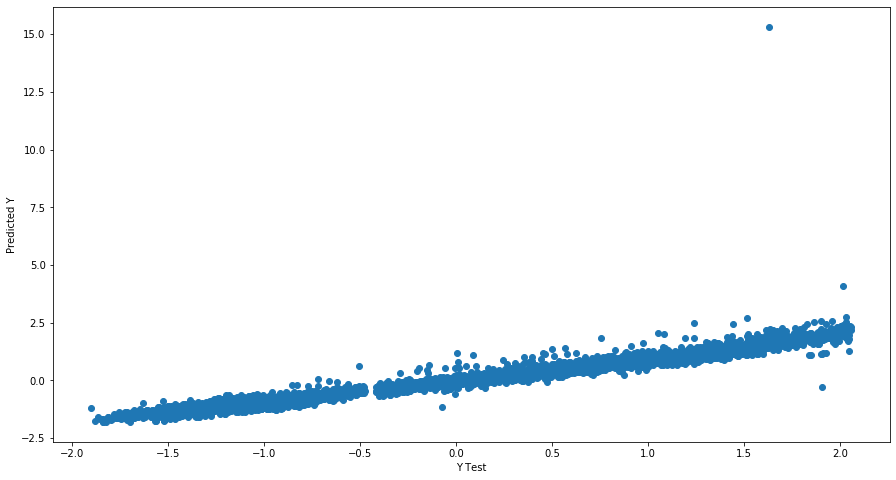

In [68]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,lm_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [69]:
from sklearn import metrics

In [70]:
r2=r2_score(y_cv, lm_pred)
print('MAE:', metrics.mean_absolute_error(y_cv, lm_pred))
print('MSE:', metrics.mean_squared_error(y_cv, lm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, lm_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.1430958258993504
MSE: 0.07474510760500377
RMSE: 0.2733955149687057
r2 score: 0.9252548923949963


In [71]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

# GradientBoostingRegressor

In [72]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
clf_pred=clf.predict(X_cv)
clf_pred= clf_pred.reshape(-1,1)

In [74]:
r2=r2_score(y_cv, clf_pred)
print('MAE:', metrics.mean_absolute_error(y_cv, clf_pred))
print('MSE:', metrics.mean_squared_error(y_cv, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, clf_pred)))
print('r2 score:',r2)
R2_Scores.append(r2)

MAE: 0.1233542394245131
MSE: 0.026826408925960336
RMSE: 0.1637876946719757
r2 score: 0.9731735910740397


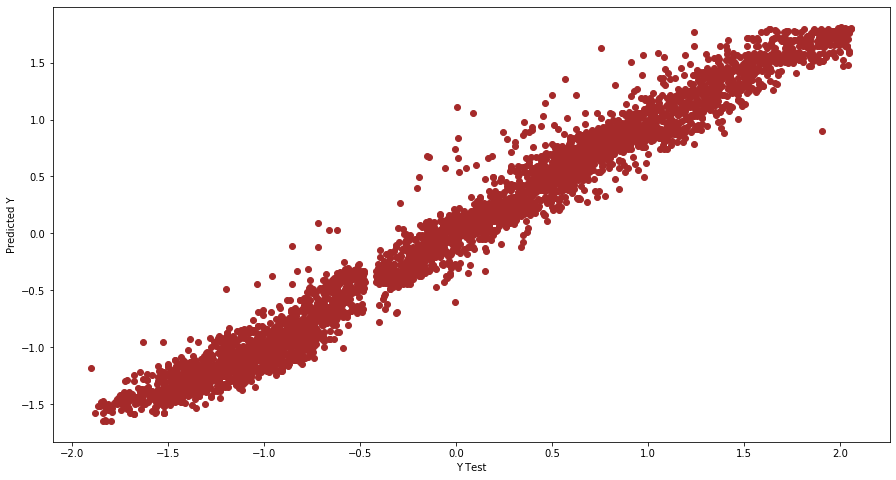

In [75]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# DecisionTreeRegressor

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [77]:
dtr_pred = dtreg.predict(X_cv)
dtr_pred= dtr_pred.reshape(-1,1)

In [78]:
r2=r2_score(y_cv, dtr_pred)
print('MAE:', metrics.mean_absolute_error(y_cv, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_cv, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, dtr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.14489500090182386
MSE: 0.041678247601625765
RMSE: 0.20415251064247475
r2 score: 0.9583217523983742


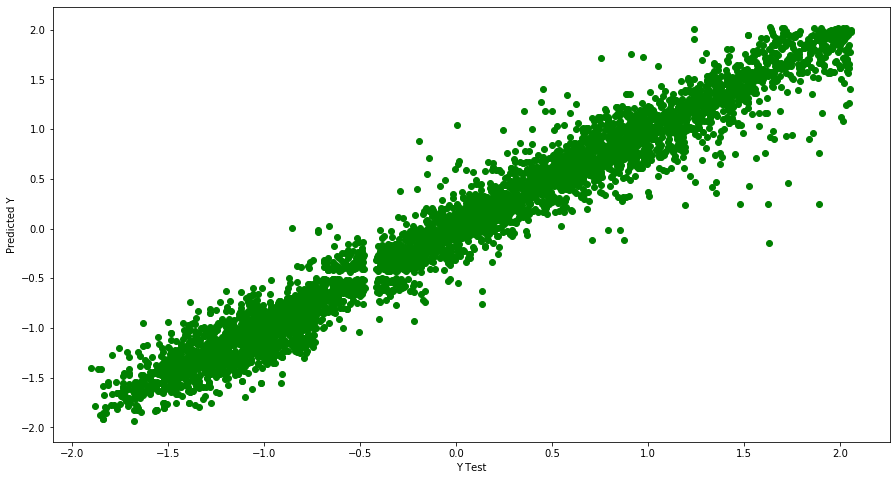

In [79]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# SVR

In [80]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
svr_pred = svr.predict(X_cv)
svr_pred= svr_pred.reshape(-1,1)

In [82]:
r2=r2_score(y_cv, svr_pred)
print('MAE:', metrics.mean_absolute_error(y_cv, svr_pred))
print('MSE:', metrics.mean_squared_error(y_cv, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, svr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.11177363689851996
MSE: 0.023240980865565534
RMSE: 0.15244992904414725
r2 score: 0.9767590191344345


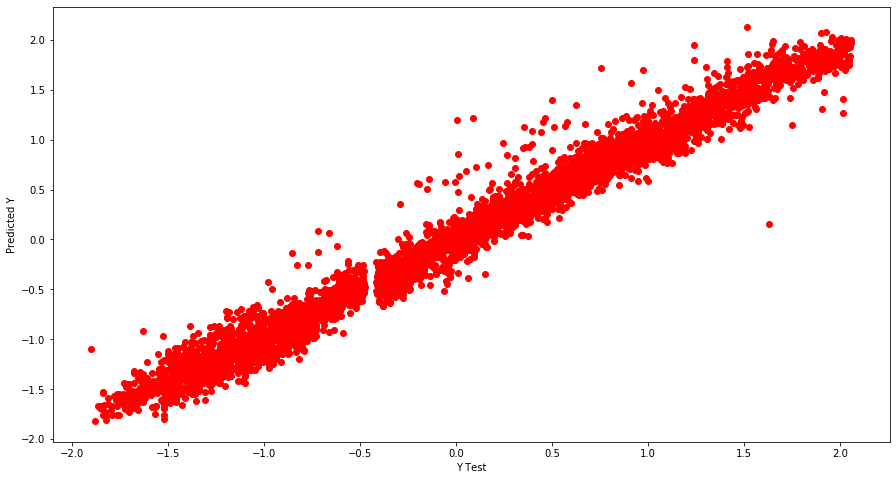

In [83]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [85]:
rfr_pred= rfr.predict(X_cv)
rfr_pred = rfr_pred.reshape(-1,1)

In [86]:
r2=r2_score(y_cv, rfr_pred)
print('MAE:', metrics.mean_absolute_error(y_cv, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_cv, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_cv, rfr_pred)))
print('r2 score:',r2)

R2_Scores.append(r2)


MAE: 0.11557853031191308
MSE: 0.02471160700650098
RMSE: 0.15719925892478304
r2 score: 0.975288392993499


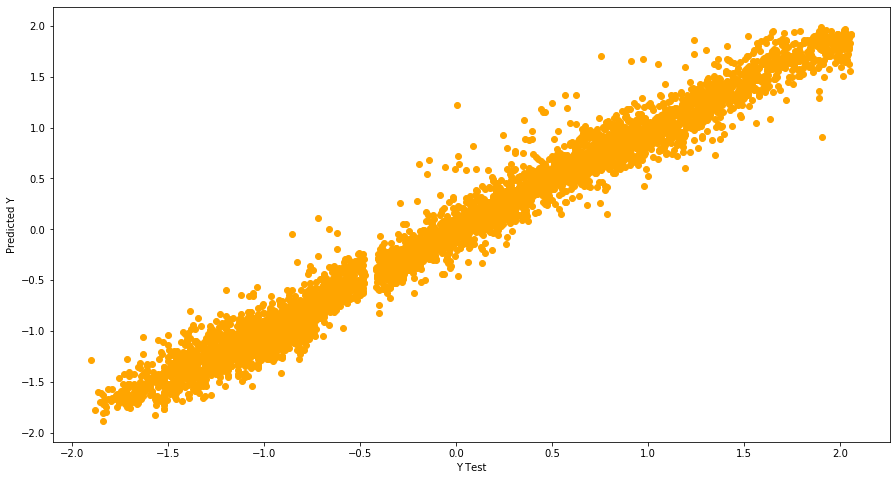

In [87]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Stacking

In [88]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [89]:
models = [rfr,svr,lm]
names = ['Random Forest', 'svr','Linear regression']
#params_grid = [KR_param_grid, EN_param_grid, LASS_param_grid, GB_param_grid, BR_param_grid, LL_param_grid, RFR_param_grid, XGB_param_grid]
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
stacked_validation_train = pd.DataFrame()
stacked_test_train = pd.DataFrame()
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

row_index=0

for alg in models:
    
    #gs_alg = GridSearchCV(alg, cv = shuff)
    #params_grid.pop(0)
    
    gs=alg.fit(X_train, y_train)
    #gs_best = alg.best_estimator_
    stacked_validation_train.insert(loc = row_index, column = names[0], value = gs.predict(X_cv))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking validation dataset...')
    
    stacked_test_train.insert(loc = row_index, column = names[0], value = gs.predict(X_test))
    print(row_index+1, alg.__class__.__name__, 'predictions added to stacking test dataset...')
    print("-"*50)
    names.pop(0)
    print('MAE:',alg, metrics.mean_absolute_error(y_cv,gs.predict(X_cv) ))
    print('MSE:',alg,metrics.mean_squared_error(y_cv, gs.predict(X_cv)))
    print('RMSE:',alg, np.sqrt(metrics.mean_squared_error(y_cv, gs.predict(X_cv))))
    print('r2 score:',r2_score(y_cv, gs.predict(X_cv)))
    row_index+=1
    

1 RandomForestRegressor predictions added to stacking validation dataset...
1 RandomForestRegressor predictions added to stacking test dataset...
--------------------------------------------------
MAE: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False) 0.11557853031191308
MSE: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False) 0.0

In [90]:
stacked_validation_train.head()

,Random Forest,svr,Linear regression
0,0.647454,1.059700,0.956704
1,-1.156744,-1.164520,-1.071620
2,-0.979303,-0.958718,-0.937367
3,-0.416123,-0.431293,-0.410036
4,-0.838154,-0.863270,-0.865523


In [91]:
stacked_test_train.head()

,Random Forest,svr,Linear regression
0,1.199527,1.148822,1.028751
1,-0.265094,-0.335133,-0.280202
2,-0.815800,-0.894497,-0.828501
3,-0.311886,-0.365091,-0.359831
4,0.287171,0.472549,0.308416


In [92]:
# First drop the Lasso results from the table, as we will be using Lasso as the meta-model
#drop = ['Lasso']
#stacked_validation_train.drop(drop, axis=1, inplace=True)
#stacked_test_train.drop(drop, axis=1, inplace=True)

# Now fit the meta model and generate predictions
meta_model = clf
gf=meta_model.fit(stacked_validation_train, y_cv)
#meta_model = meta_model.predict(stacked_test_train)
meta_model_pred= np.expm1(meta_model.predict(stacked_test_train))
print("Meta-model trained and applied!...")

Meta-model trained and applied!...


In [93]:
y_test

array([[ 1.24422973],
       [-0.31990861],
       [-0.95403605],
       ...,
       [ 0.95817394],
       [-0.13278482],
       [ 0.55042456]])

In [94]:
r2=r2_score(y_test, gf.predict(stacked_test_train))
print('MAE:', metrics.mean_absolute_error(y_test, gf.predict(stacked_test_train)))
print('MSE:', metrics.mean_squared_error(y_test, gf.predict(stacked_test_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gf.predict(stacked_test_train) )))
print('r2 score:',r2)

R2_Scores.append(r2)

MAE: 0.10858290724720036
MSE: 0.022575412405723572
RMSE: 0.15025116440721373
r2 score: 0.9774245875942764


In [95]:
from sklearn.neighbors import KNeighborsRegressor
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_cv)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = metrics.mean_squared_error(y_cv, y_pred)
mae = metrics.mean_absolute_error(y_cv, y_pred)
rmse = metrics.mean_squared_error(y_cv, y_pred)**0.5
r2 = r2_score(y_cv, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.1s finished



###### KNeighbours Regression ######
Score : 0.9703
[0.96948093 0.97180357 0.96782095 0.97108229 0.97032855]

MSE    : 0.03 
MAE    : 0.12 
RMSE   : 0.17 
R2     : 0.97 


In [96]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_cv, y_cv))
pred=clf_knn.predict(X_cv)
r2 = r2_score(y_cv, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)

Score : 0.9723
R2     : 0.97 


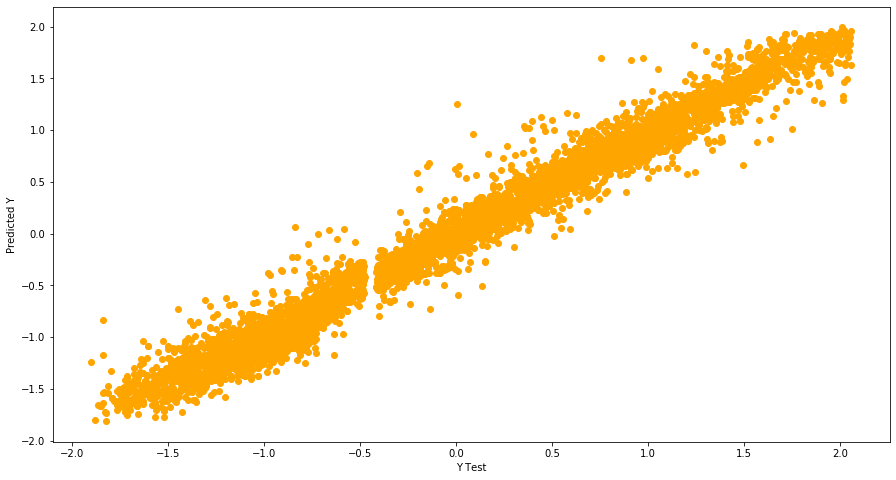

In [97]:
plt.figure(figsize=(15,8))
plt.scatter(y_cv,pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [98]:
compare = pd.DataFrame({'Algorithms' : models1 , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)
compare

,Algorithms,R2-Scores
0,Linear Regression,0.925255
1,GradientBoosting Regression,0.973174
2,DecisionTreeRegressor,0.958322
3,SVR,0.976759
4,RandomForestRegressor,0.975288
5,stacking,0.977425
6,KNeighbours Regression,0.972320
